In [1]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4+3*X + np.random.rand(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.52086293],
       [2.98220511]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
# print(X_new)
# print(X_new_b)
y_predict


array([[ 4.52086293],
       [10.48527314]])

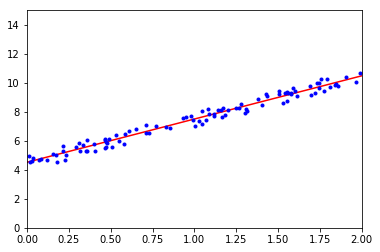

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
lin_reg.intercept_, lin_reg.coef_

(array([4.52086293]), array([[2.98220511]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.52086293],
       [10.48527314]])

In [8]:
# 4.GradientDescent 梯度下降

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.52086293],
       [2.98220511]])

In [9]:
# 4.Stochastic GradientDescent  随机梯度下降

# 看了很久没明白为什么是双重for循环，代码和公式不一致
# 内层的for大概是为了方便构造逐步变小的学习率
# 看下面单层for循环，固定学习率的例子

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.51501953],
       [2.97550156]])

In [14]:
# 来一个单层for循环，固定学习率的例子
# 和公式一致，很容易理解了

n_epochs = 50

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    random_index = np.random.randint(100)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = 0.1
    theta = theta - eta * gradients

theta

array([[4.42262319],
       [2.94704939]])

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.39118097]), array([3.06801151]))